<a href="https://colab.research.google.com/github/diego-andrade279/Aula-de-deploy-de-modelos-de-machine-learning-usando-streamlit/blob/main/Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Bibliotecas da clusterização
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
import statsmodels.api as sm

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)

In [ ]:
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
# Baixa os dados de treinamento
link = 'https://drive.google.com/file/d/1MW2DeWGKj0fJIIWNN1SWu0vyXUVWj0UU/view?usp=sharing'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Mall_Customers.csv')
df = pd.read_csv('/content/Mall_Customers.csv')
df.shape

(200, 5)

In [ ]:
df.columns = ['idcliente', 'genero', 'idade', 'renda_anual', 'nivel_gastos']

In [ ]:
df.set_index('idcliente')

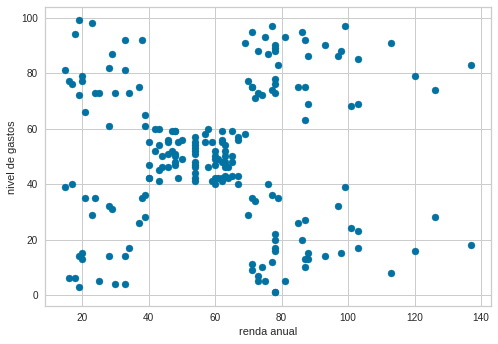

In [ ]:
plt.scatter(df.renda_anual, df.nivel_gastos)
plt.xlabel('renda anual')
plt.ylabel('nivel de gastos')
plt.show()

In [ ]:
df_kmeans = df[['renda_anual', 'nivel_gastos']]
x = df_kmeans.values

#### Kmeans

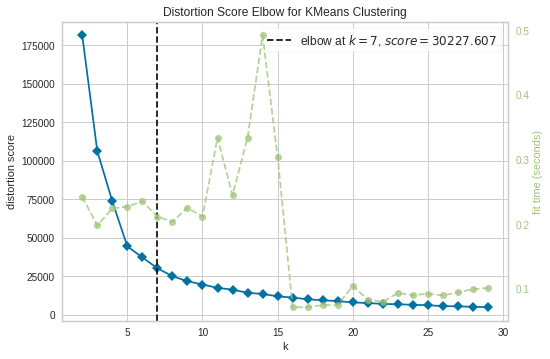

In [ ]:
kModel = KMeans()
visualizer = KElbowVisualizer(kModel, k=(2, 30), timings=True)
visualizer.fit(x)
visualizer.show()

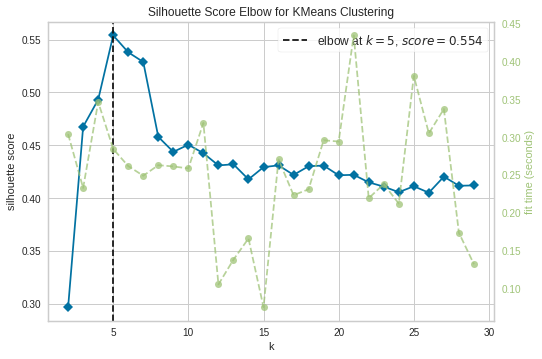

In [ ]:
kModel = KMeans()
visualizer = KElbowVisualizer(kModel, k=(2, 30), metric='silhouette', timings=True)
visualizer.fit(x)
visualizer.show()

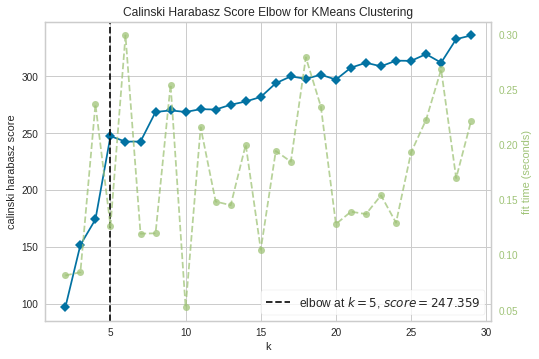

In [ ]:
kModel = KMeans()
visualizer = KElbowVisualizer(kModel, k=(2, 30), metric='calinski_harabasz', timings=True)
visualizer.fit(x)
visualizer.show()

In [ ]:
# Instanciamos o algoritmo KMeans com 5 clusters, conforme vimos nas métricas acima 
kmeans_final = KMeans(n_clusters=5)

In [ ]:
# Treinamento do KMeans
kmeans_final.fit(x)

KMeans(n_clusters=5)

In [ ]:
# Faz o predict para definir quais clusters pertencem os dados
cluster_pred = kmeans_final.predict(x)

In [ ]:
# Coletamos os centroids dos clusters
cluster_centers = kmeans_final.cluster_centers_

In [ ]:
cluster_centers

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

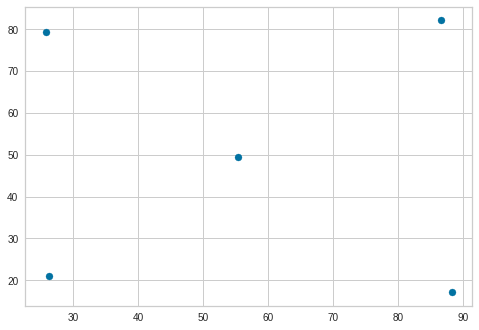

In [ ]:
plt.scatter(cluster_centers[:,0], cluster_centers[:,1])
plt.show()

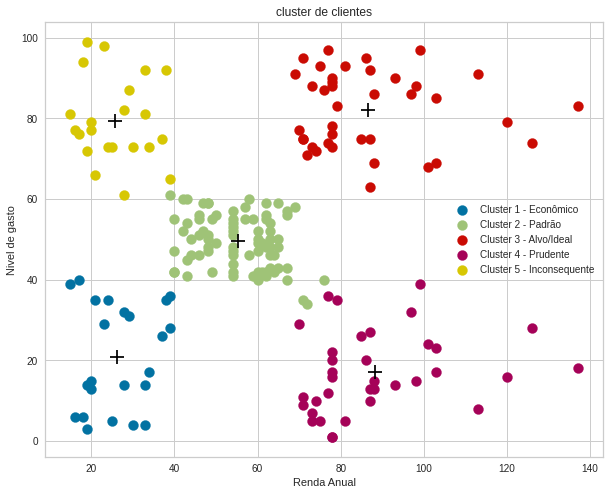

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x[cluster_pred==0, 0], x[cluster_pred==0, 1],s=100, label='Cluster 1 - Econômico')
plt.scatter(x[cluster_pred==1, 0], x[cluster_pred==1, 1],s=100, label='Cluster 2 - Padrão')
plt.scatter(x[cluster_pred==2, 0], x[cluster_pred==2, 1],s=100, label='Cluster 3 - Alvo/Ideal')
plt.scatter(x[cluster_pred==3, 0], x[cluster_pred==3, 1],s=100, label='Cluster 4 - Prudente')
plt.scatter(x[cluster_pred==4, 0], x[cluster_pred==4, 1],s=100, label='Cluster 5 - Inconsequente')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker='+', s=200, c='black')
plt.legend()
plt.title('cluster de clientes')
plt.xlabel('Renda Anual')
plt.ylabel('Nivel de gasto')
plt.show()

#### Exercício:

Aplique a clusterização no dataset Wine